#### Full work done by Jasmine Akter Ratri and Maria Mehjabin Shenjuti 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#import keras
import re
import string

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [5]:
df['Label'].value_counts()

0    2137
1    1872
Name: Label, dtype: int64

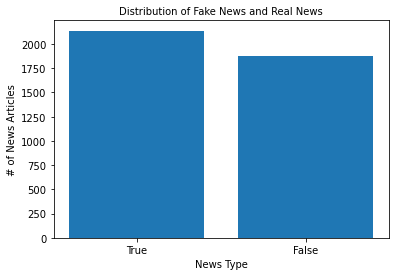

In [2]:
import matplotlib.pyplot as plt 
import numpy as np

x = np.array(["True","False"])
y = np.array([2137,1872])

plt.title('Distribution of Fake News and Real News', size=10)
plt.xlabel('News Type', size=10)
plt.ylabel('# of News Articles', size=10)
plt.bar(x,y)
plt.show()

In [7]:
len(df)

4009

In [8]:
wordnet = WordNetLemmatizer()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_doc(doc):
    
    # remove punctuation
    doc = re.sub(r"[\s+\.\!\/_,|%^*#(+\"\')?<>:-]", " ", doc)
    
    # remove @
    pattern2 = r"@\S+"
    doc = re.sub(pattern2, "", doc)

    # tokenization
    tokens = nltk.word_tokenize(doc)
    
    # lower words
    tokens = [word.lower() for word in tokens]
    
    # remove stopwords
    tokens = [w for w in tokens if not w in stop_words]
    
    # Return a cleaned string or list
    return" ".join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pial\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
print("The number of nan headlines is", df['Headline'].isna().sum())
print("The number of nan bodies is", df['Body'].isna().sum())
print("The number of nan bodies is", df['Label'].isna().sum())

df = df.dropna(subset=[ 'Body'])
len(df)

The number of nan headlines is 0
The number of nan bodies is 21
The number of nan bodies is 0


3988

In [10]:
nltk.download('punkt')
df['Headline_clean'] = df['Headline'].apply(lambda x: clean_doc(x))
df['Body_clean'] = df['Body'].apply(lambda x: clean_doc(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pial\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
corpus = pd.concat([df['Headline_clean'], df['Body_clean']])
MAX_FEATURES = 10000

#Assign the type of vectorizer
VECTORIZER = 'tfidf'

from sklearn.feature_extraction.text import TfidfVectorizer
def fit_tfidf(documents):
    tfidf = TfidfVectorizer(input = 'content', stop_words = 'english',  
                            max_features = MAX_FEATURES )
    tfidf.fit(documents.values)
    return tfidf

from sklearn.feature_extraction.text import CountVectorizer
def fit_bow(documents):
    bow = CountVectorizer(input='content', stop_words='english',
                          max_features = MAX_FEATURES)
    bow.fit(documents.values)
    return bow

if VECTORIZER == 'tfidf':
    vectorizer = fit_tfidf(corpus)

elif VECTORIZER == 'bow':
    vertorizer = fit_bow(corpus)

headline_matrix = vectorizer.transform(df['Headline_clean'])
body_matrix = vectorizer.transform(df['Body_clean'])

In [12]:
body_matrix

<3988x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 596914 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix, hstack
X = hstack([headline_matrix, body_matrix]).toarray()
#X = np.concatenate((headline_matrix, body_matrix), axis=1)
y = df.Label
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

#### Naive Bayes done by Maria Mehjabin Shenjuti

In [14]:
from sklearn.naive_bayes import MultinomialNB
##--Multinomial Naive Bayes Model
clf = MultinomialNB().fit(X_train,  y_train)
prediction = clf.predict(X_test)
print("The accuracy for testing data is", np.mean(prediction == y_test) )
print("The accuracy for training data is", np.mean(clf.predict(X_train) == y_train) )

The accuracy for testing data is 0.9388164493480441
The accuracy for training data is 0.9729187562688064


#### SVM done by Jasmine Akter Ratri

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
param_grid =  {'loss': ['hinge', 'squared_loss'], 'penalty': ['l2','l1'],
       'alpha':[0.01,0.001],'max_iter':[10]}

clf2 = GridSearchCV(SGDClassifier(), param_grid)
clf2.fit(X_train, y_train)
print("Best parameters are: ", clf2.best_params_)

Best parameters are:  {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 10, 'penalty': 'l2'}


In [16]:
from sklearn.metrics import classification_report 
y_pred = clf2.predict(X_test)
print("The classification report is:")
print(classification_report(y_test, y_pred))

print("The accuracy for testing data is", np.mean(y_pred == y_test) )
print("The accuracy for training data is", np.mean(clf2.predict(X_train) == y_train) )

The classification report is:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       560
           1       0.95      0.99      0.97       437

    accuracy                           0.97       997
   macro avg       0.97      0.98      0.97       997
weighted avg       0.97      0.97      0.97       997

The accuracy for testing data is 0.9739217652958877
The accuracy for training data is 0.9983283182881979


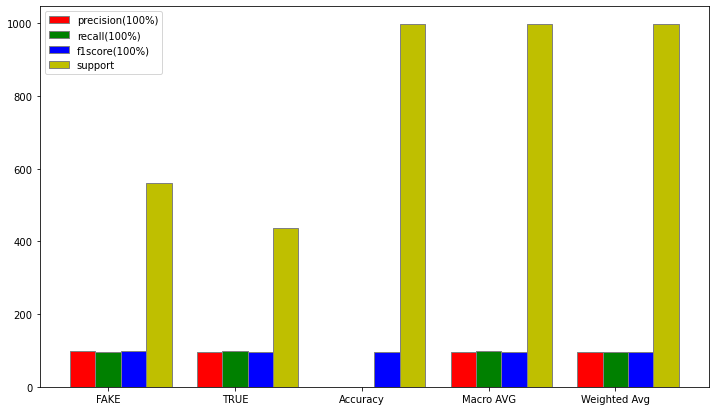

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(12, 7))
 
# set height of bar
precision = [99, 95, 0, 97,97]
recall = [96, 99, 0, 98, 97]
f1score = [98, 97, 97, 97, 97]
support = [560, 437, 997, 997, 997]
# Set position of bar on X axis
br1 = np.arange(len(precision))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
# Make the plot
plt.bar(br1,precision, color ='r', width = barWidth,
        edgecolor ='grey', label ='precision(100%)')
plt.bar(br2,recall , color ='g', width = barWidth,
        edgecolor ='grey', label ='recall(100%)')
plt.bar(br3, f1score, color ='b', width = barWidth,
        edgecolor ='grey', label ='f1score(100%)')
plt.bar(br4, support, color ='y', width = barWidth,
        edgecolor ='grey', label ='support')
# Adding Xticks
plt.xticks([r + barWidth for r in range(len(precision))],
        ['FAKE', 'TRUE', 'Accuracy', 'Macro AVG', 'Weighted Avg'])
 
plt.legend()
plt.show()